In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

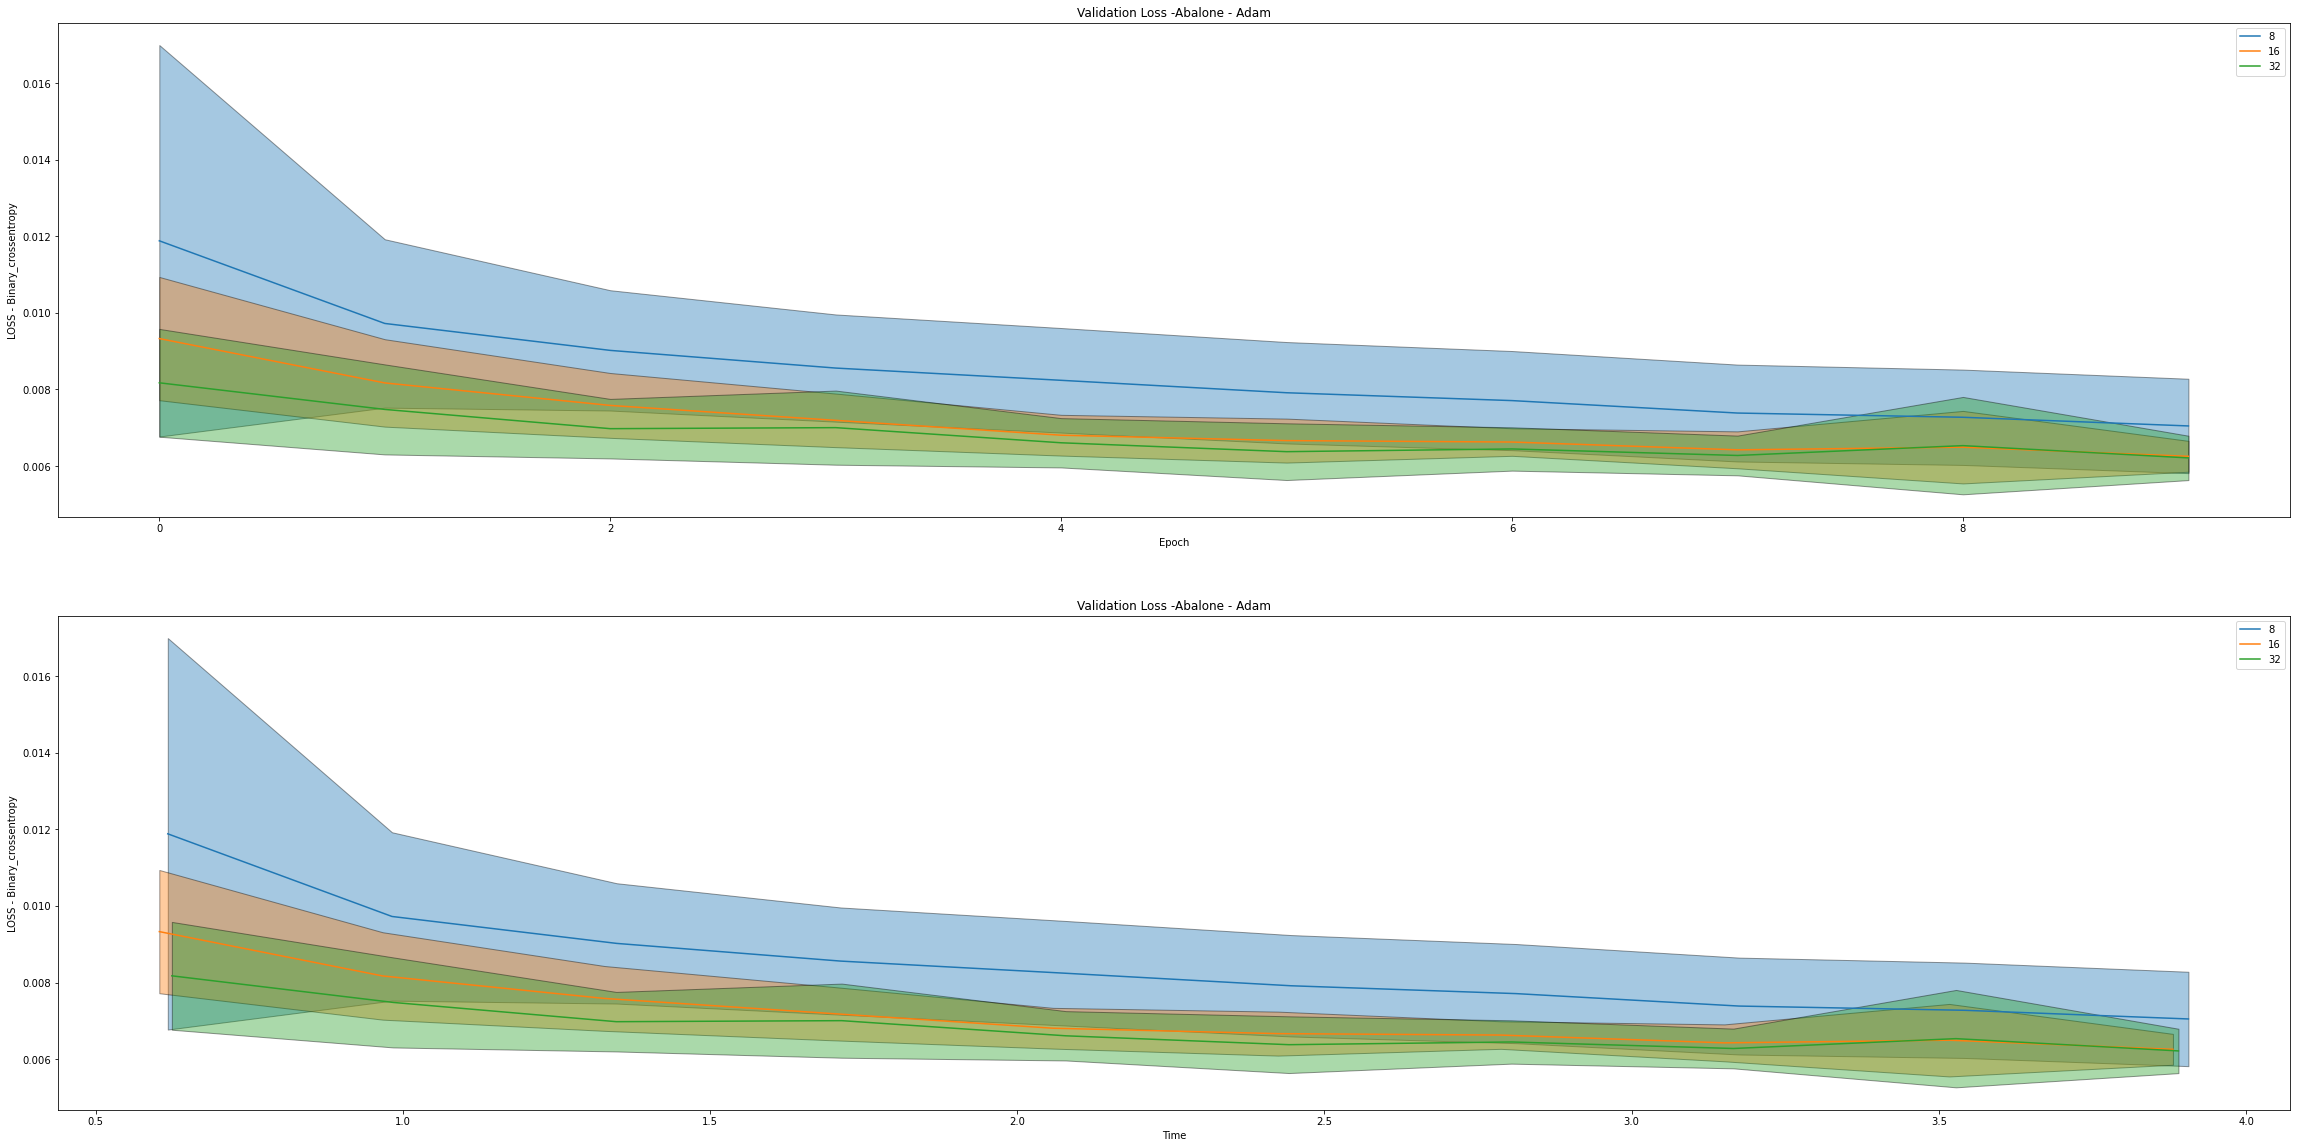

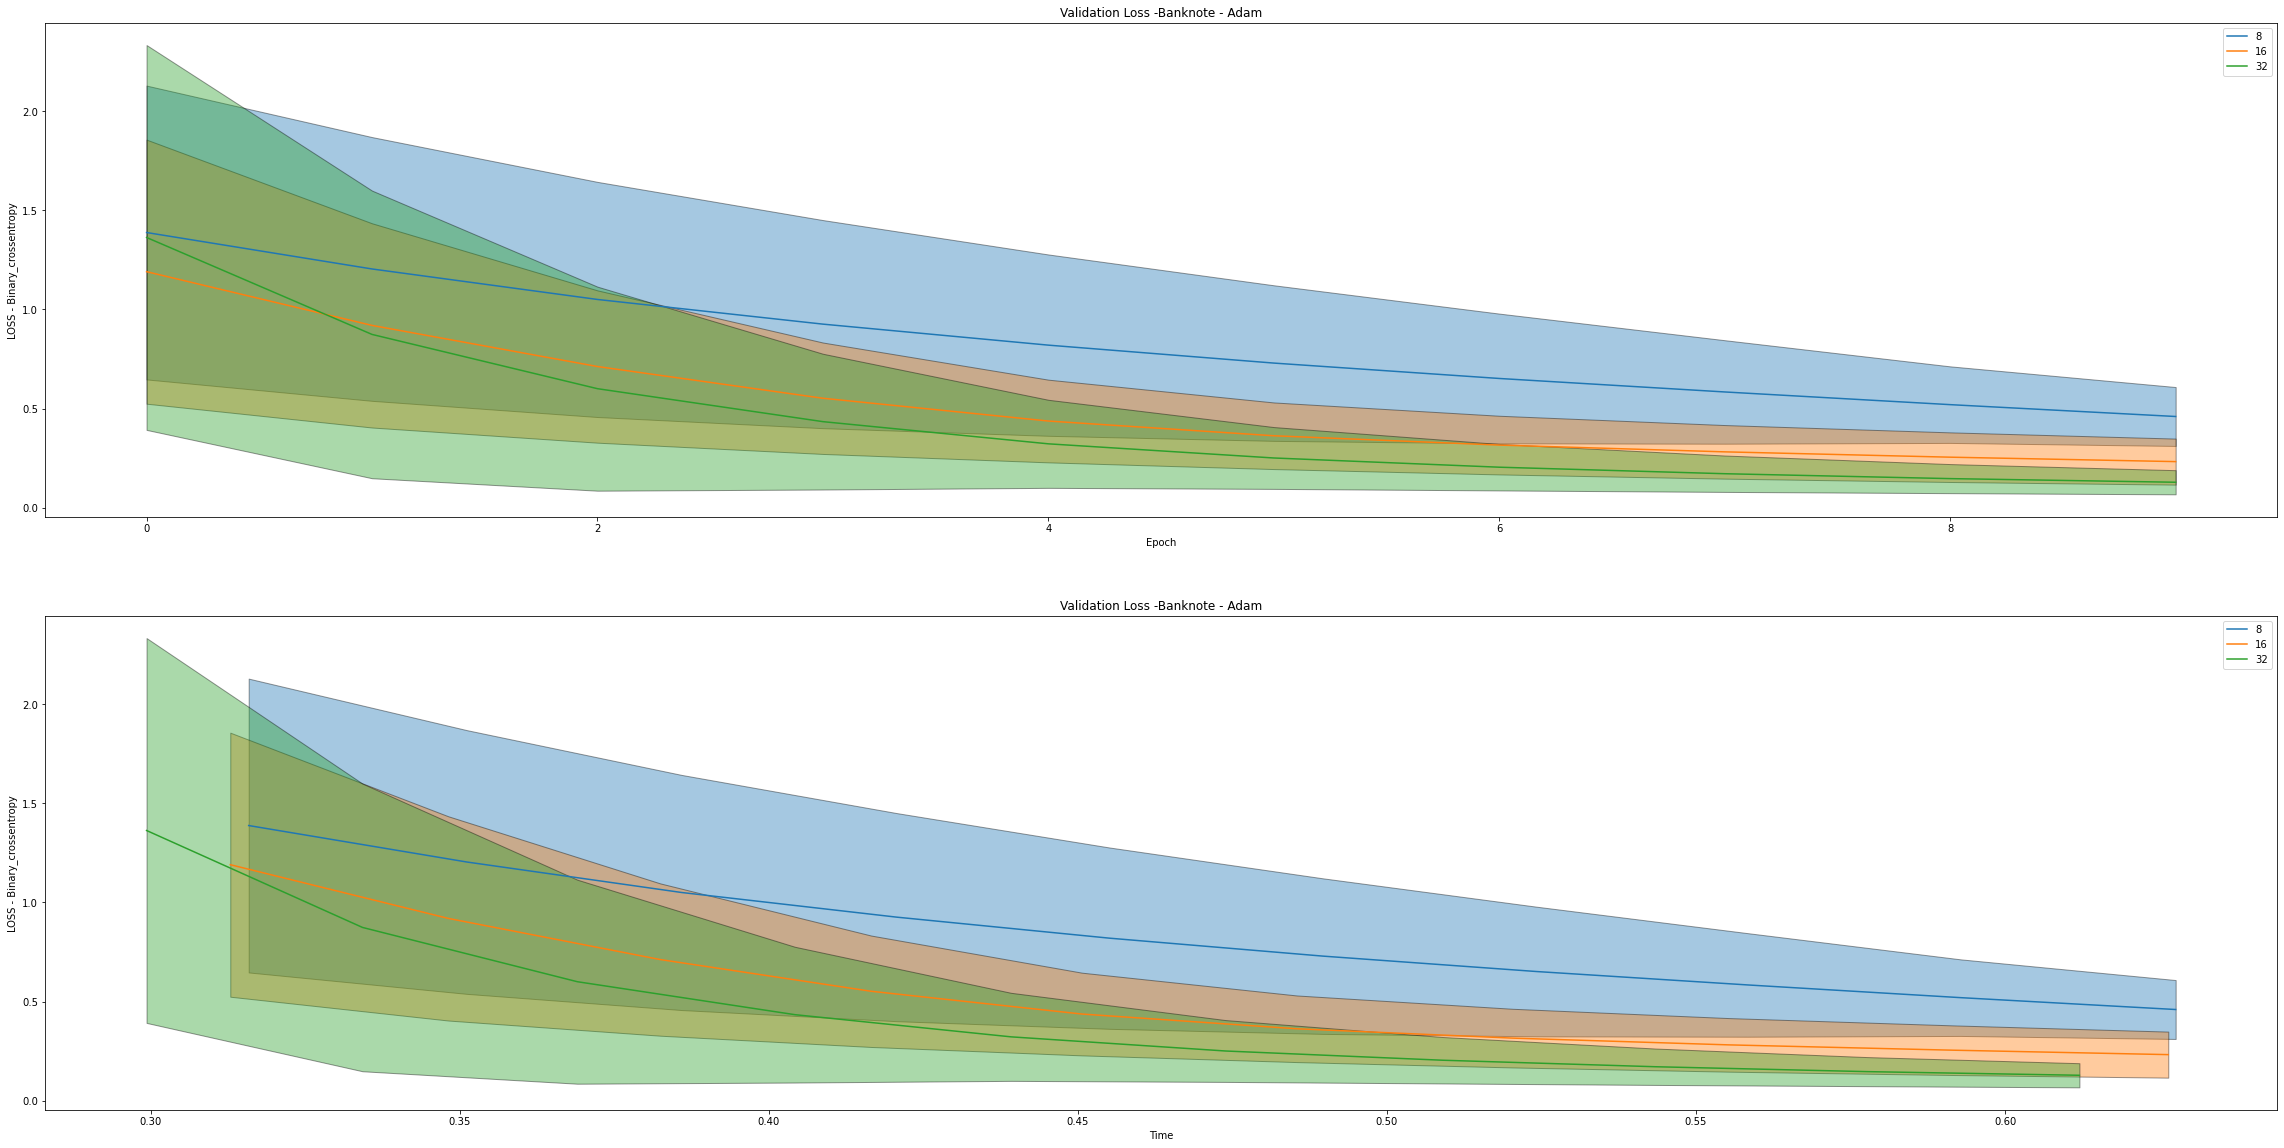

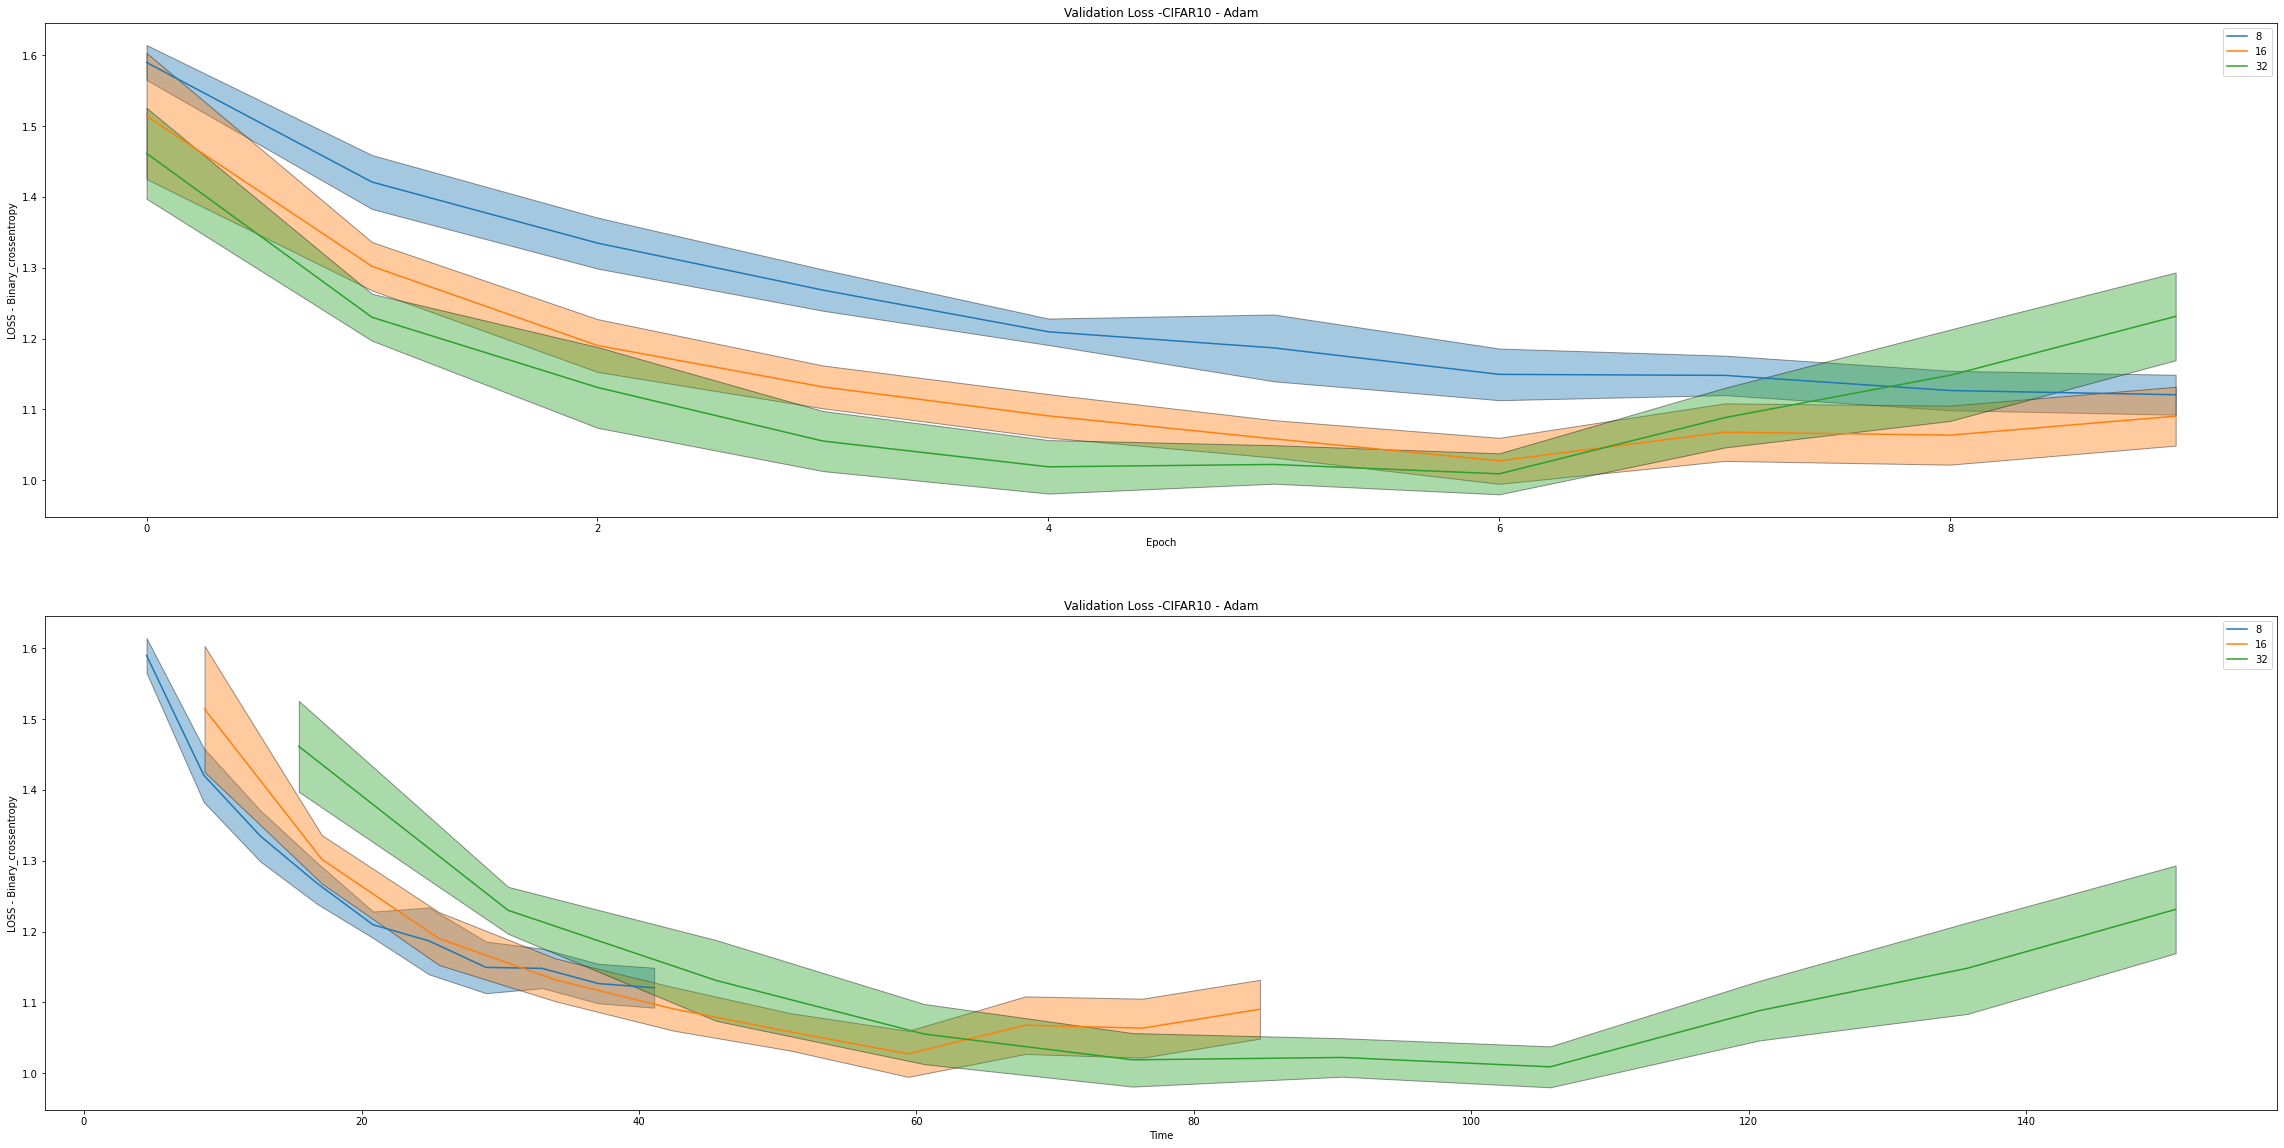

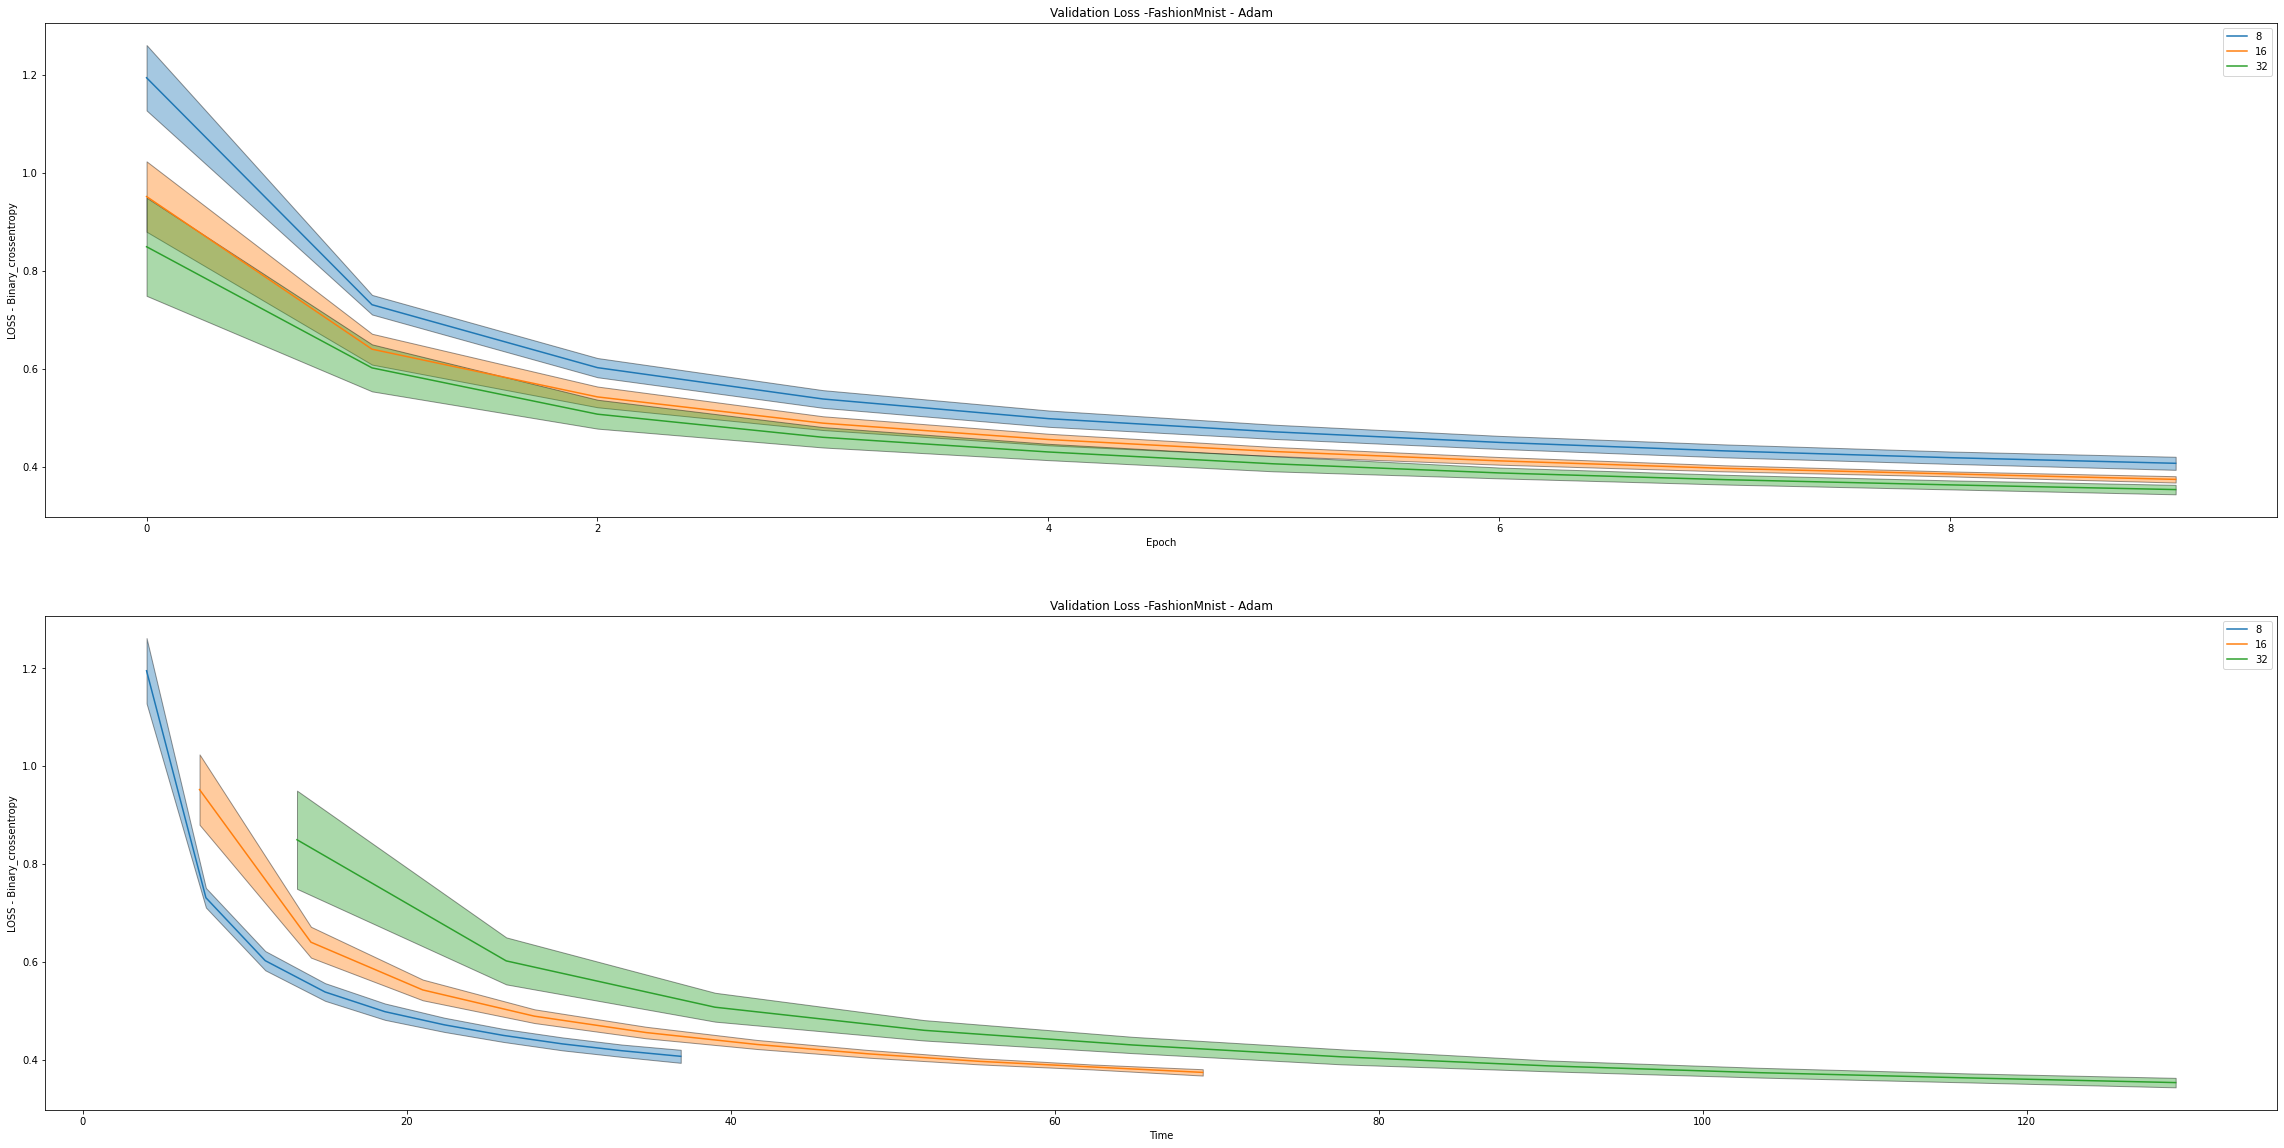

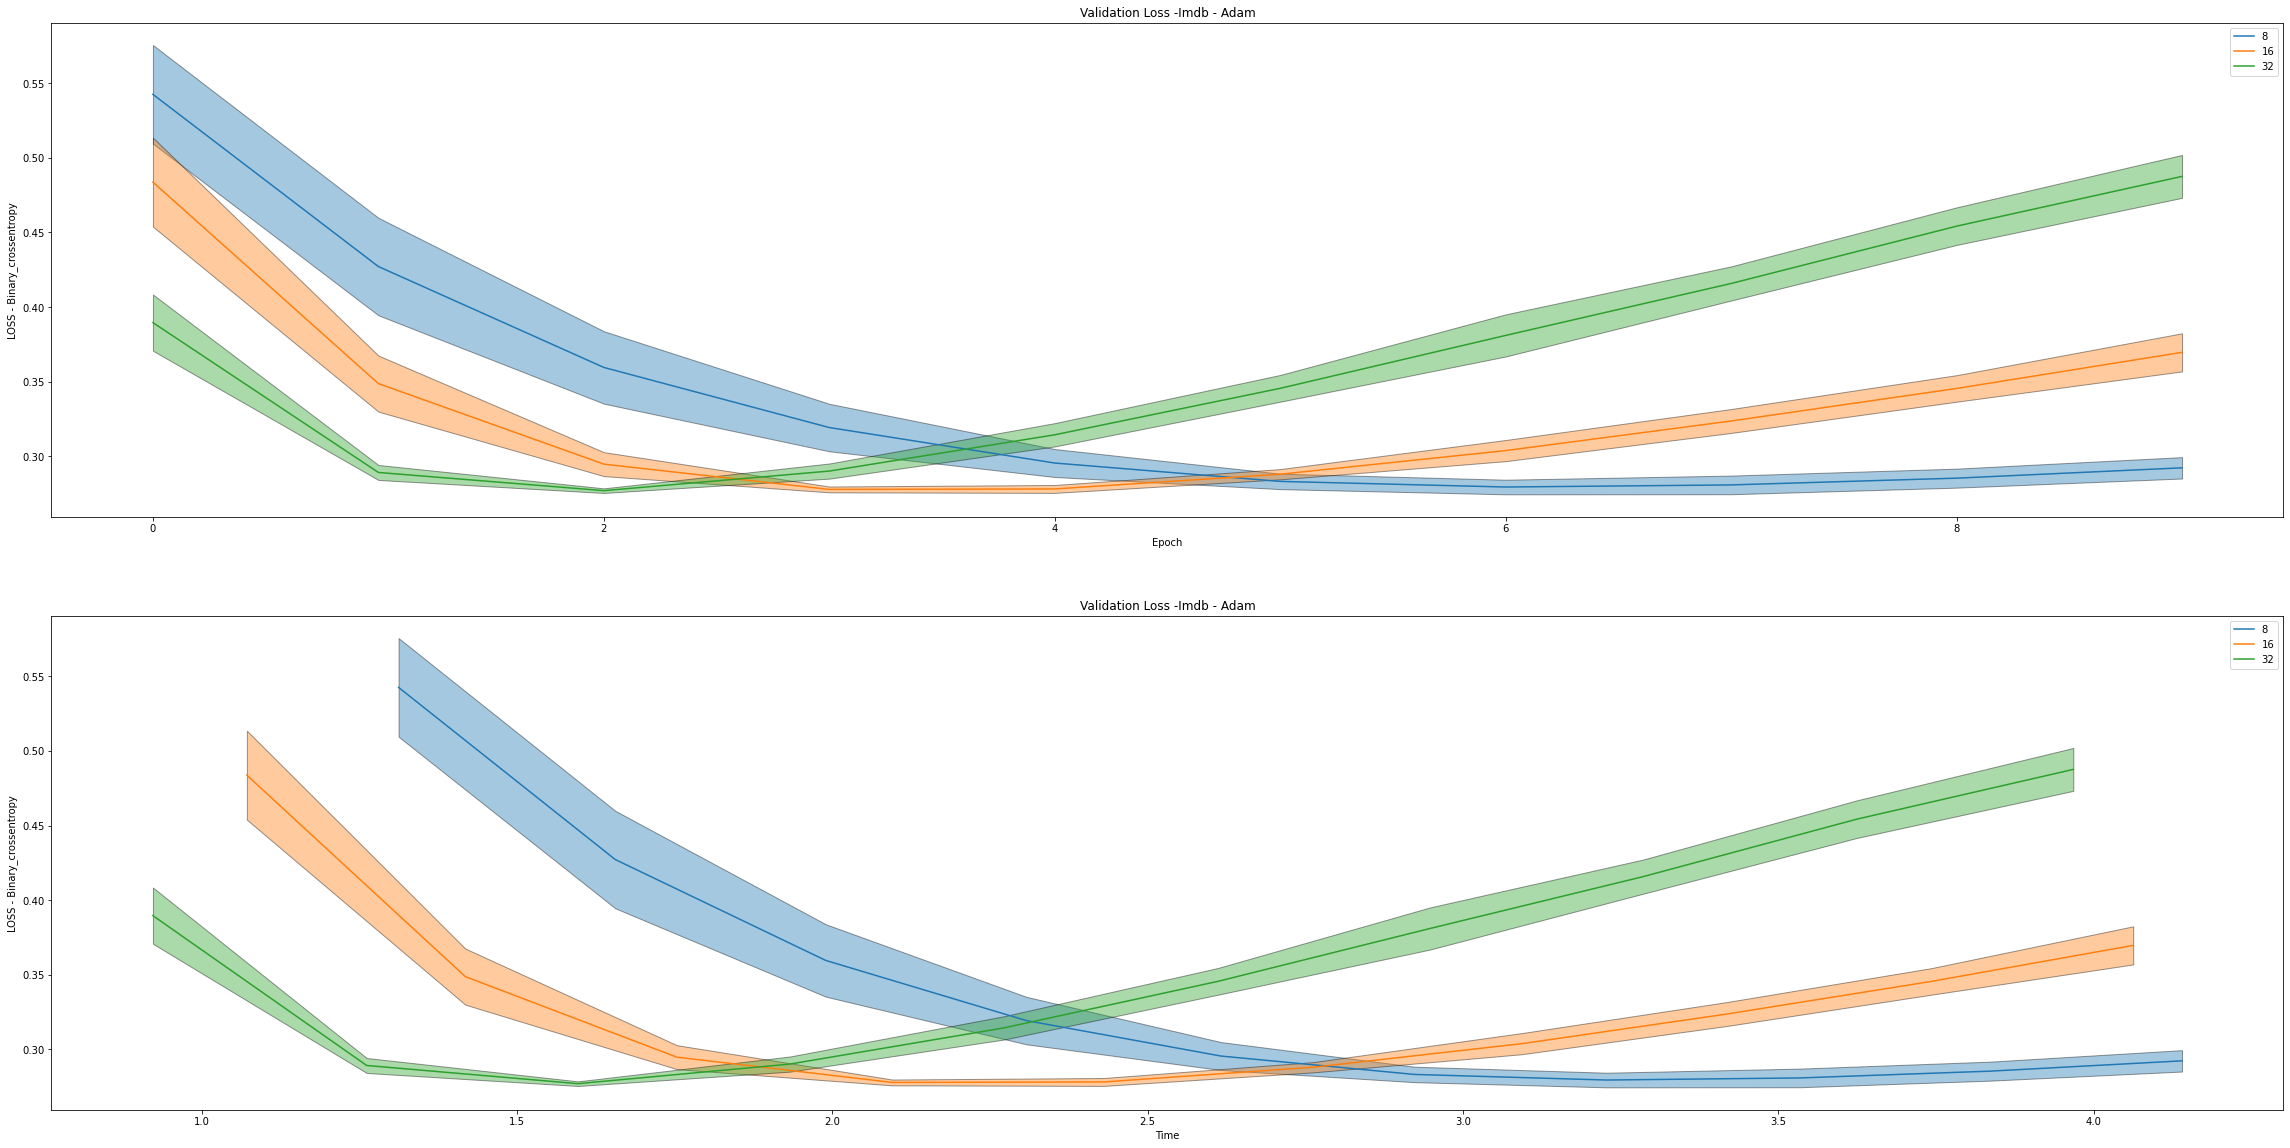

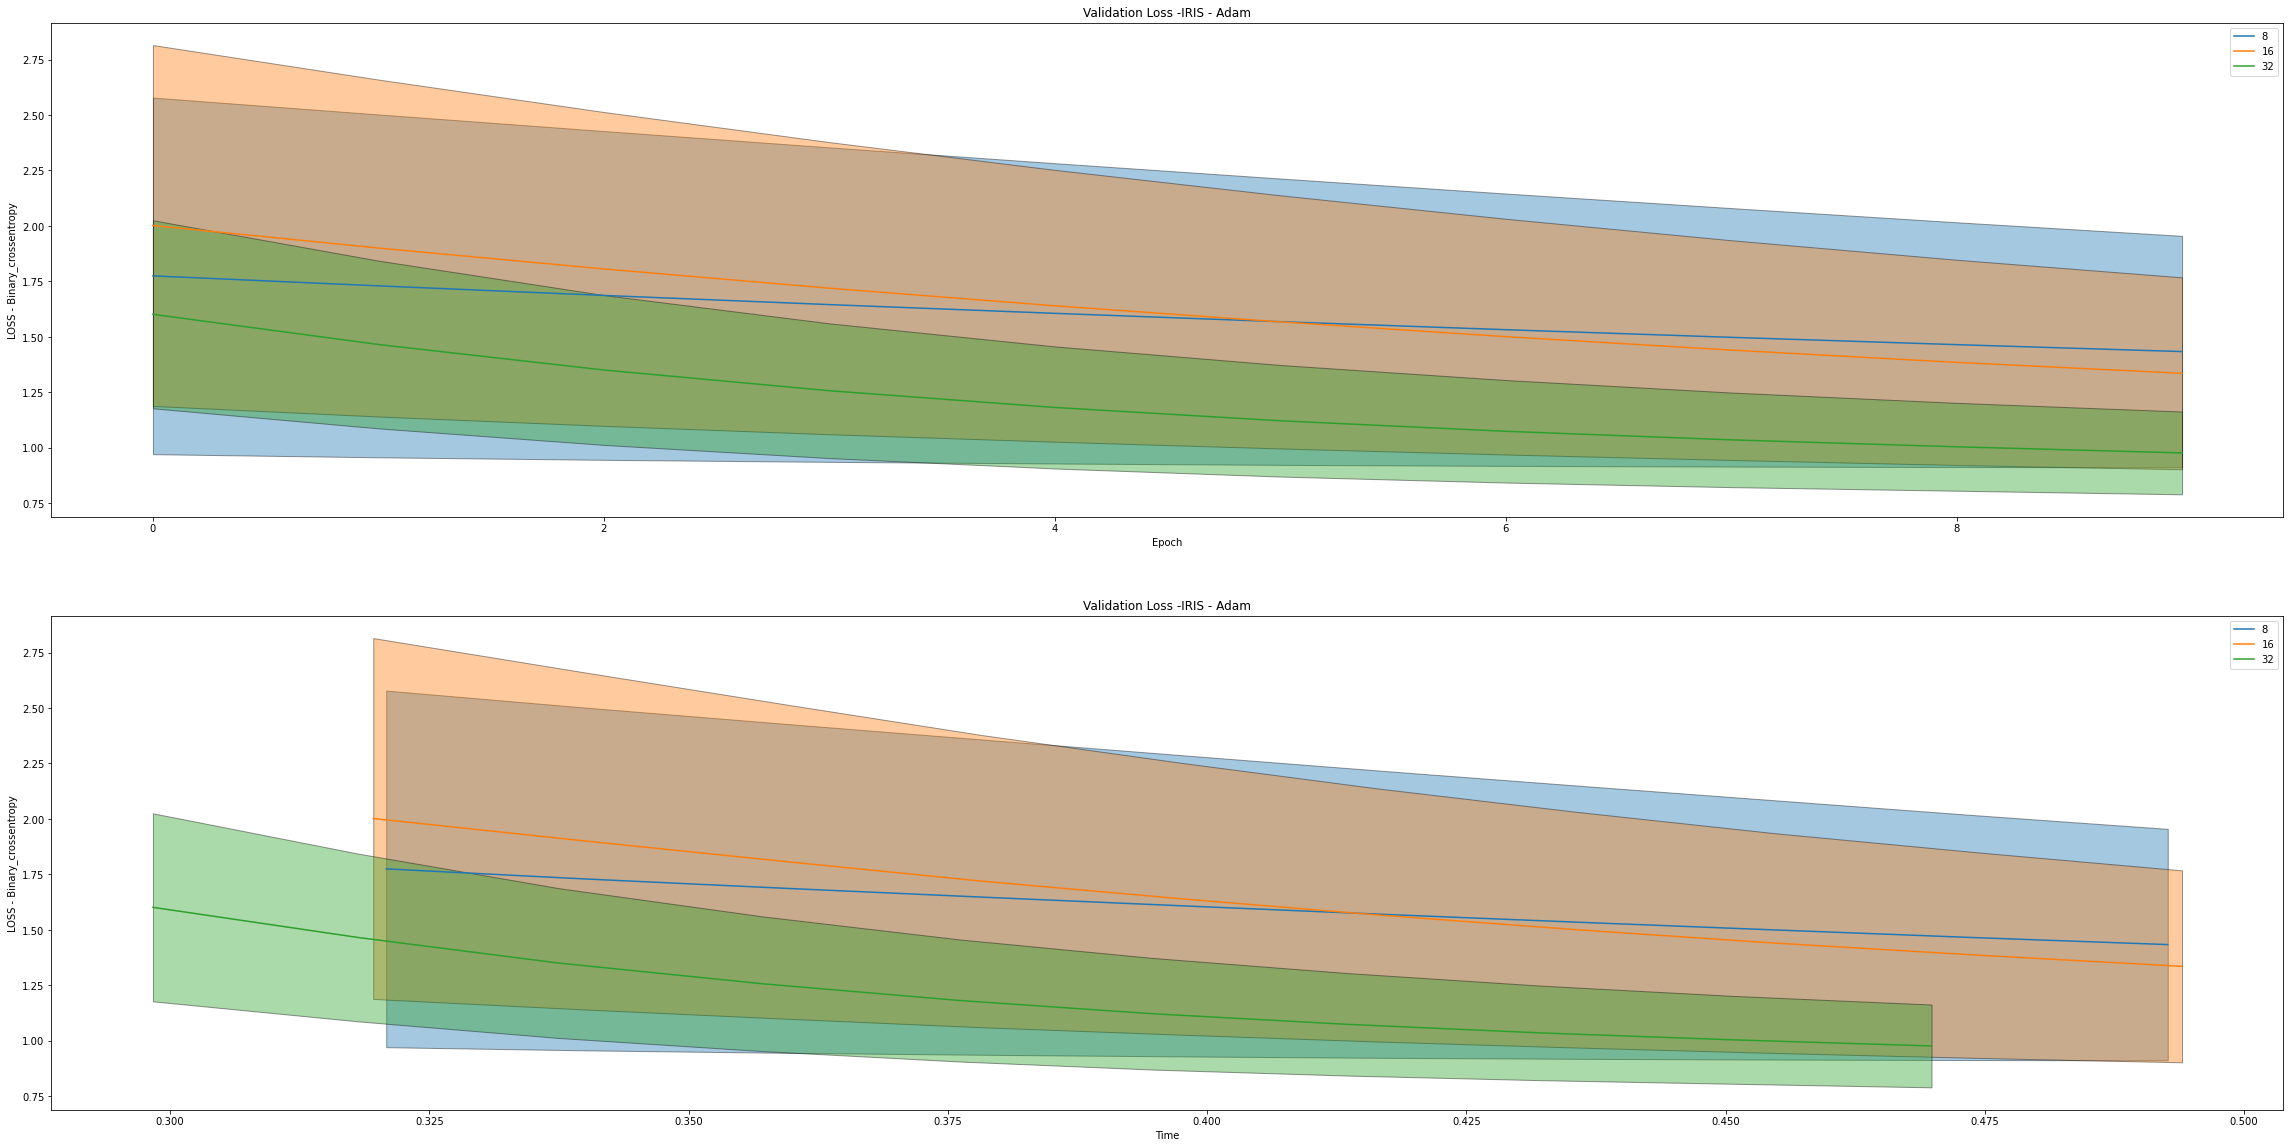

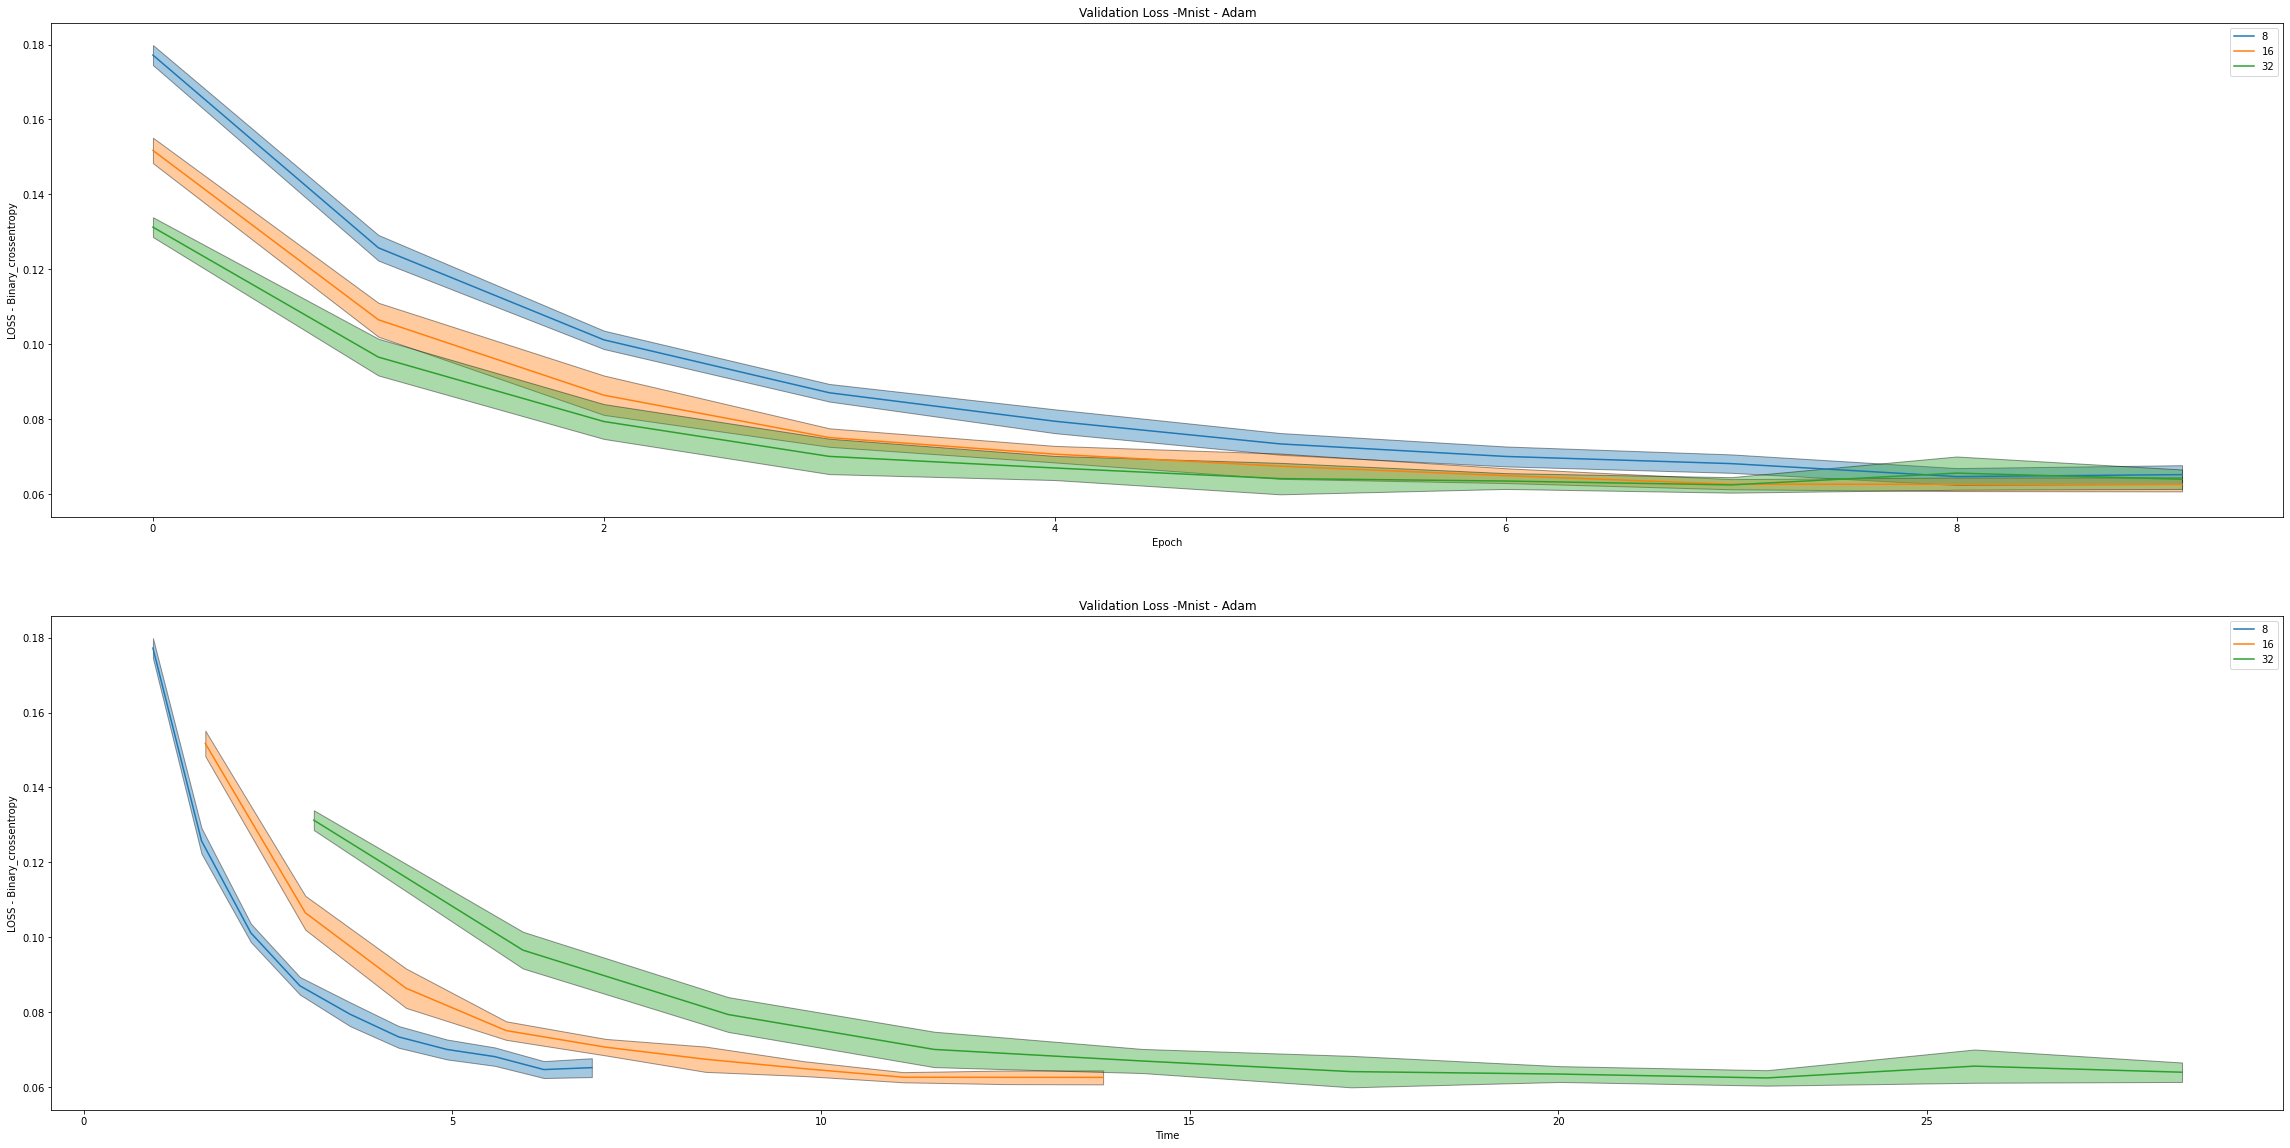

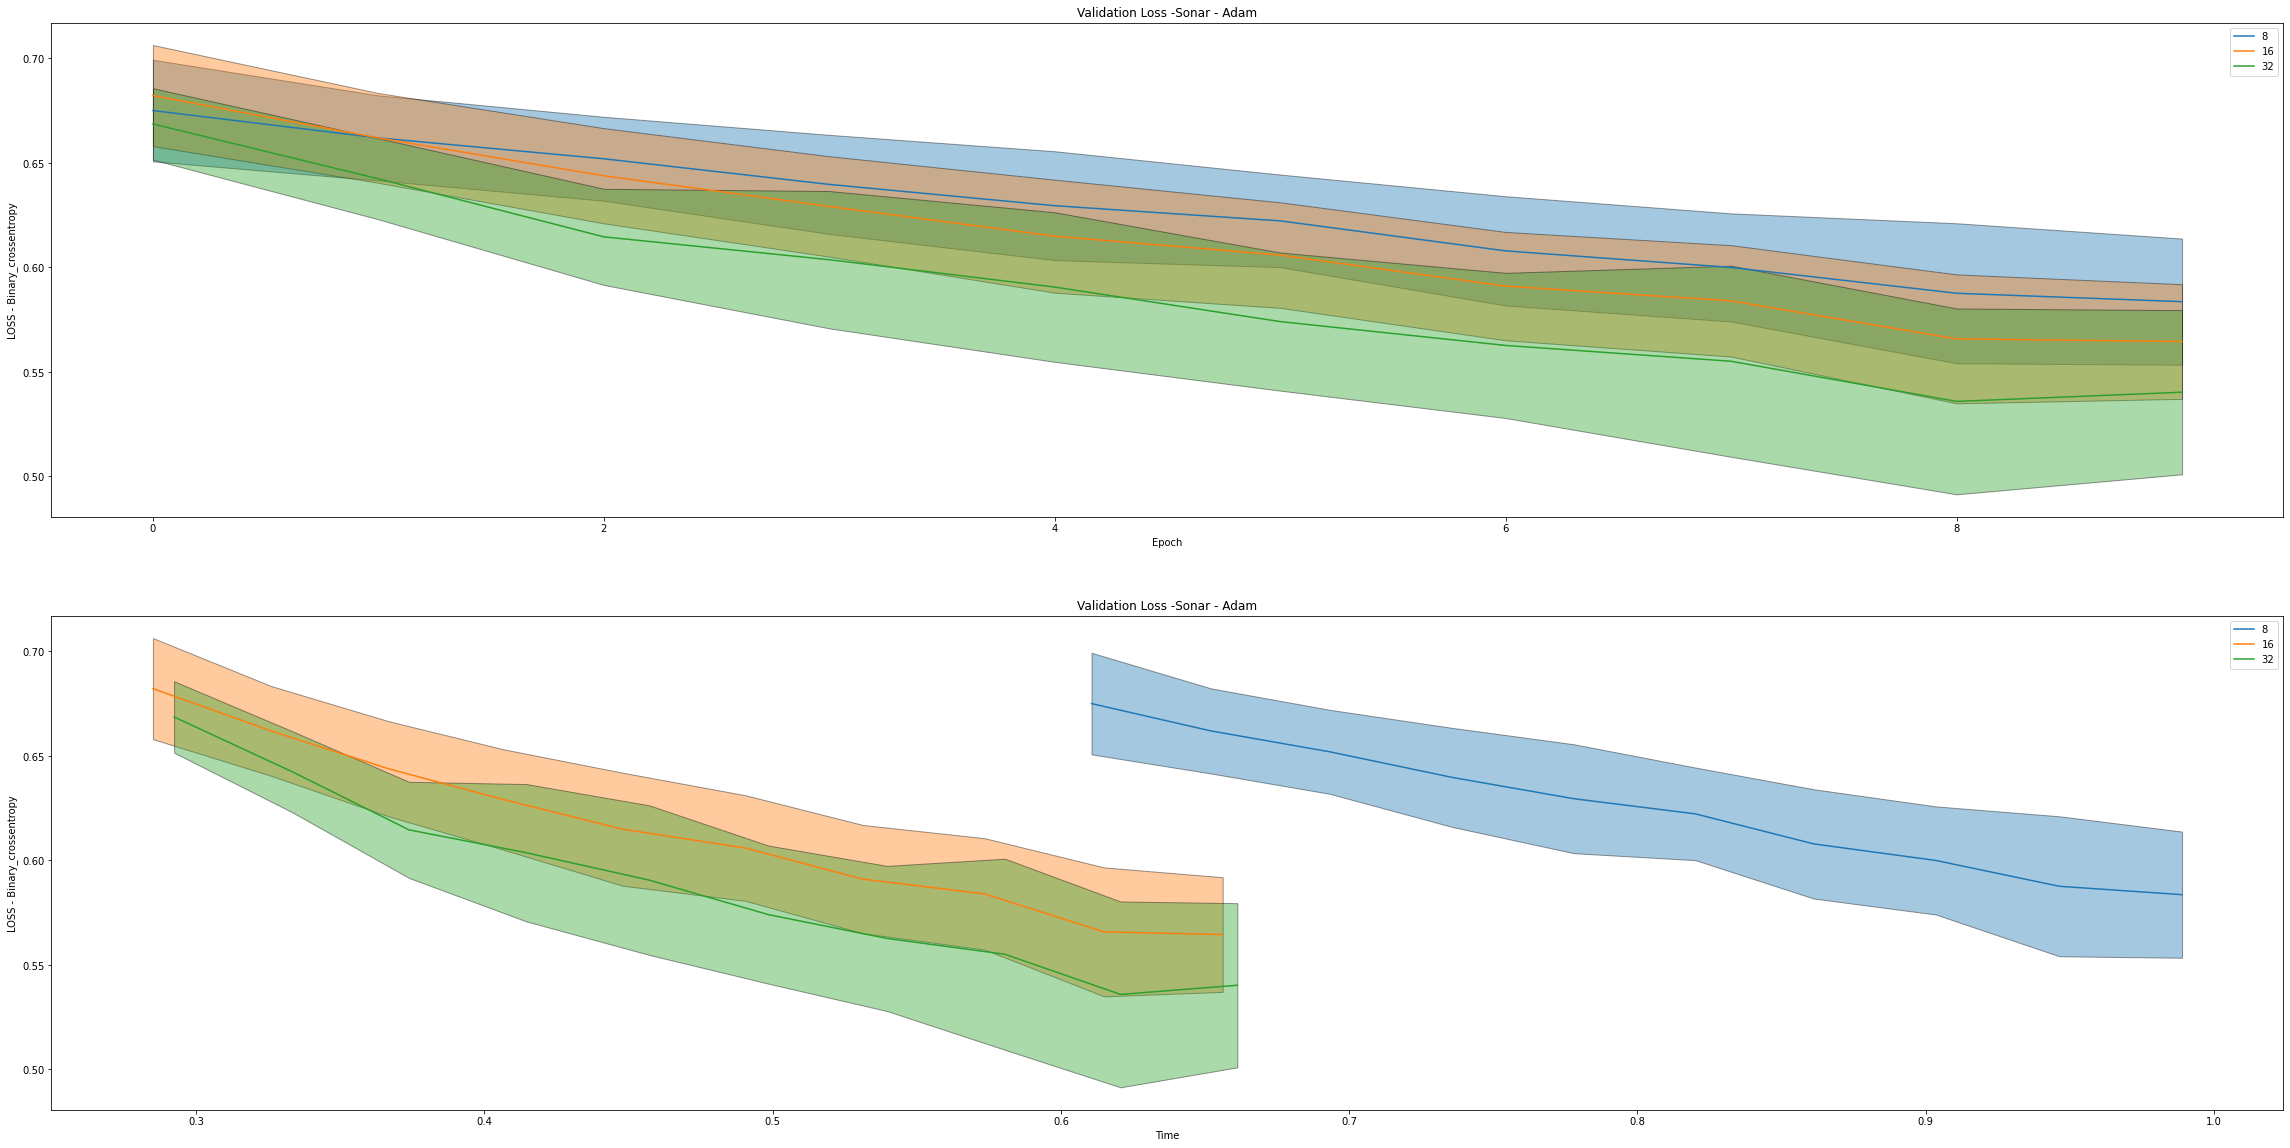

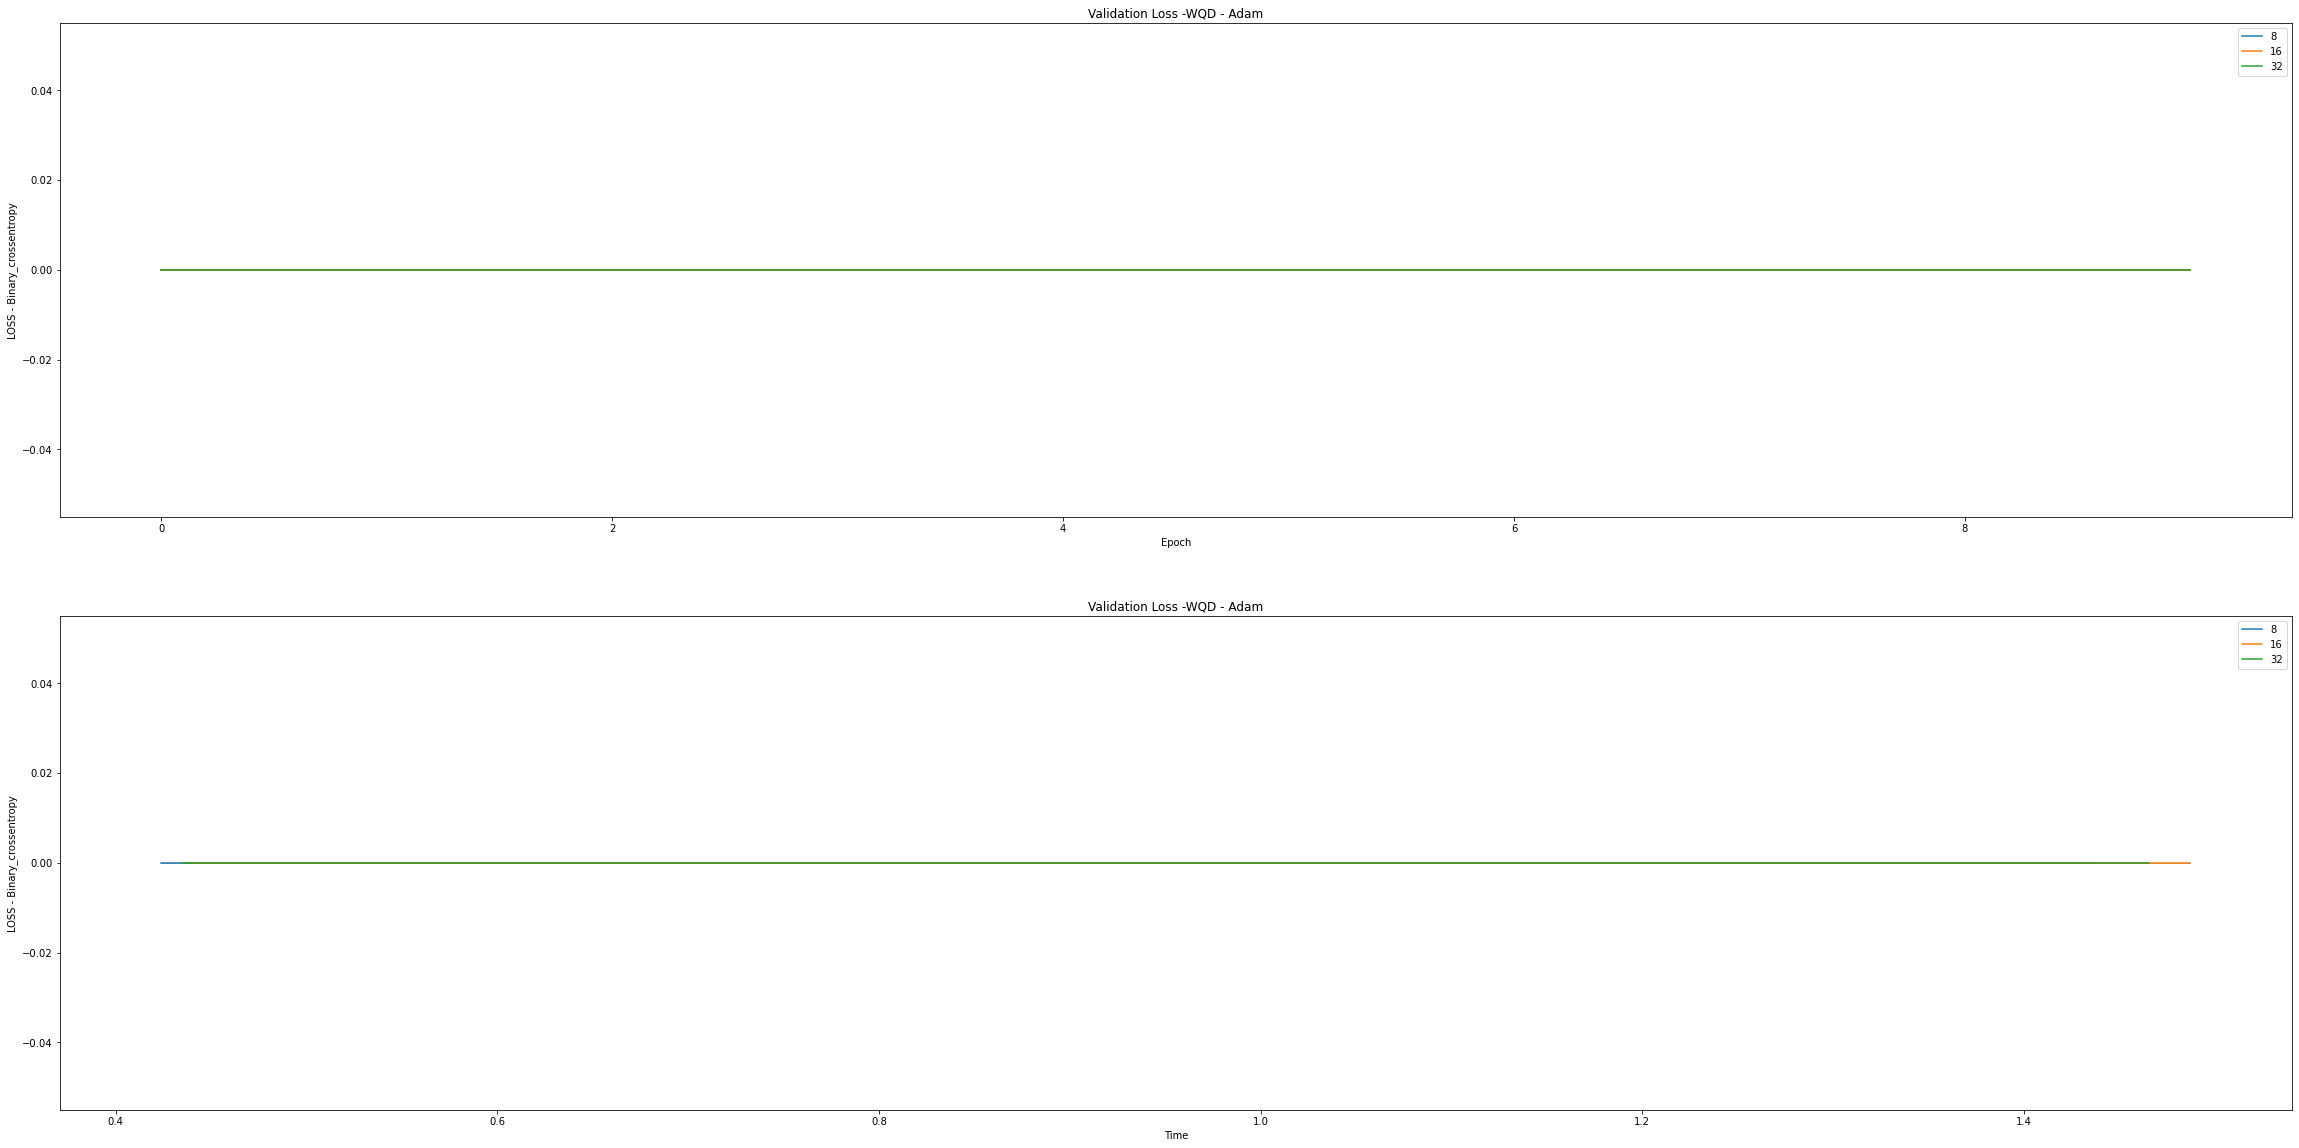

In [6]:
dataset=['Abalone','Banknote','CIFAR10','FashionMnist','Imdb','IRIS','Mnist','Sonar','WQD']

def new_name(data,mltp,seed="mean"):
    return data+"_"+str(mltp).replace(".","_")+"_seed_"+str(seed)

for d in dataset:

    seeds = list(range(0,10))
    multiply= [0.5,1,2]
    dic_Vloss={}
    dic_Tloss={}
    dic_times={}
    dic_Vloss_mean={}
    dic_Tloss_mean={}
    dic_times_mean={}
    pepochs=10
        
    for mltp in multiply:
        
        for actual_seed in seeds:
            filename =  ".\\" + d + "_seed_result/"+d+"_" + str(mltp) + "_" +str(actual_seed)+ ".csv"
            data = pd.read_csv(filename)
            index = data.index
            k = len(index)
            epochs = data['epoch']
            if pepochs >len(epochs):
                pepochs=len(epochs)

            dic_Tloss[new_name(d,mltp,actual_seed)]=data['loss'].tolist()    #Trainig loss valeus
            dic_Vloss[new_name(d,mltp,actual_seed)]=data['val_loss'].tolist()  #Validation loss valeus
            dic_times[new_name(d,mltp,actual_seed)]=data['time'].tolist()  #Validation loss valeus
        
     #calculo do valor medio e desvio padrão
    
    for mltp in multiply:
        dic_Vloss_mean[new_name(d,mltp)]=[]
        dic_times_mean[new_name(d,mltp)]=[]
        for step in list(range(0,pepochs)): 
            soma=[]
            tempos=[]
            for actual_seed in seeds:
                soma.append(dic_Vloss[new_name(d,mltp,actual_seed)][step])
                tempos.append(dic_times[new_name(d,mltp,actual_seed)][step])
            média= sum(soma)/len(seeds)
            desvio=np.std(soma)
            time=sum(tempos)/len(seeds)
            dic_Vloss_mean[new_name(d,mltp)].append((média,desvio)) #Validation loss valeus médio
            dic_times_mean[new_name(d,mltp)].append(time) #Validation loss valeus médio
            
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = [40,20]  
    plt.subplot(2,1,1)

    plt.title("Validation Loss -" + d +" - Adam")
    plt.xlabel('Epoch')
    plt.ylabel('LOSS - Binary_crossentropy')

    for mltp in multiply:

        Array_med=[]
        desvio_=[]
        for x in dic_Vloss_mean[new_name(d,mltp)]:
            Array_med.append(x[0])
            desvio_.append(x[1])
        plt.plot(list(range(0,pepochs)),Array_med , label=str(int(16*mltp)))
        data = {
            'x': list(range(0,pepochs)),
            'y1': [y - e for y, e in zip(Array_med, desvio_)],
            'y2': [y + e for y, e in zip(Array_med, desvio_)]}
        plt.fill_between(**data, alpha=.4, linewidth=1,     
                     edgecolor='k')
        plt.legend()


    plt.subplot(2,1,2)

    plt.title("Validation Loss -" + d +" - Adam")
    plt.xlabel('Time')
    plt.ylabel('LOSS - Binary_crossentropy')

    for mltp in multiply:
        time_line=[0]
        for x in dic_times_mean[new_name(d,mltp)]:
            time_line.append(time_line[-1]+x)
        time_line=time_line[1:]
        Array_med=[]
        desvio_=[]
        for x in dic_Vloss_mean[new_name(d,mltp)]:
            Array_med.append(x[0])
            desvio_.append(x[1])
        plt.plot(time_line,Array_med , label=str(int(16*mltp)))
        data = {
            'x':  time_line,
            'y1': [y - e for y, e in zip(Array_med, desvio_)],
            'y2': [y + e for y, e in zip(Array_med, desvio_)]}
        plt.fill_between(**data, alpha=.4, linewidth=1,     
                     edgecolor='k')
        plt.legend()

    fig.savefig(d+'_media.png')